In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
DATA = './data'

In [2]:
df = pd.read_csv(f'{DATA}/Columbia_EDA.csv')

grades = df['grade']
grades = list(map(lambda g: np.abs(6 - (ord(g) - 65)), df['grade']))
print(grades)

df.insert(0, 'num_grade', grades)

[5, 4, 4, 4, 5, 6, 4, 2, 1, 5, 4, 5, 4, 5, 5, 3, 4, 6, 5, 4, 5, 5, 5, 5, 5, 4, 3, 5, 5, 6, 6, 4, 6, 4, 5, 5, 6, 5, 5, 6, 6, 3, 3, 6, 5, 6, 5, 6, 6, 5, 5, 5, 4, 5, 2, 2, 5, 5, 3, 5, 3, 4, 3, 5, 5, 3, 4, 1, 4, 3, 3, 4, 3, 6, 4, 4, 1, 6, 2, 3, 4, 5, 6, 5, 5, 3, 5, 3, 4, 5, 5, 2, 5, 5, 1, 5, 3, 6, 5]


In [3]:
df.columns

Index(['num_grade', 'id', 'member_id', 'CLI', 'term', 'int_rate',
       'installment$', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'debt to income', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'mths_since_last_delinq'],
      dtype='object')

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]), array([0, 1, 2, 3, 4, 1, 2, 3, 4, 2, 3, 4, 3, 4, 4]))
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0.5, 1, 'Correlation matrix with mask')

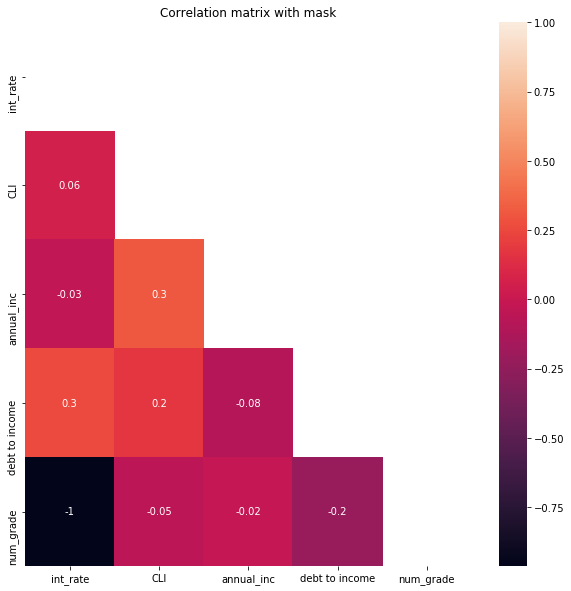

In [4]:
plt.figure(figsize=(10, 10))

small_df = df[[
    'int_rate',
    'CLI',
    'annual_inc',
    'debt to income',
    'num_grade',
]]


# Calc a mask so that we only look at the important values
c = small_df.corr()
mask = np.zeros_like(c)
print(mask)
indicies = np.triu_indices_from(mask)
print(indicies)
mask[indicies] = True
print(mask[indicies])

sns.heatmap(c, annot=True, fmt='.1g', mask=mask).set_title('Correlation matrix with mask')

Text(0.5, 1, 'Full correlation matrix')

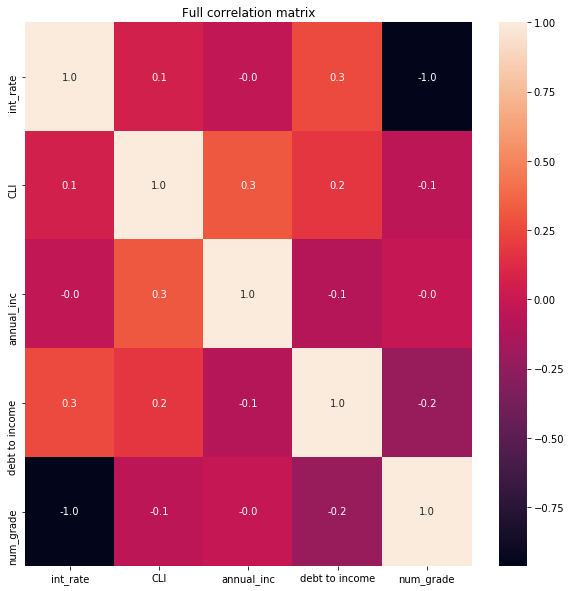

In [5]:
plt.figure(figsize=(10, 10))

sns.heatmap(c, annot=True, fmt='.001f').set_title('Full correlation matrix')